In [2]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, simplify, solve, solveset, diff, plot, plot_parametric, plot_implicit, latex, Integral
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt
%matplotlib inline

## Занятие 13
## Математический анализ
## Применение интегралов для вычисления площади поверхности тела вращения
### Задание 1.
Вычислить площадь поверхности, которая образуется в результате вращения $y = \sqrt{x}$ вокруг оси OX при $x$ от 0 до 1.

In [5]:
x = Symbol('x', positive=True)
y = Symbol('y')

Eq1 = sympy.Eq(y, x**S.Half)
y1 = solve(Eq1, y)[0]
display(y1)

S_OX1 = 2*Pi*Integral(y1*(1 + y1.diff(x)**2)**S.Half, (x, 0, 1)) 
display(S_OX1, S_OX1.doit().simplify())

#plot_implicit(Eq1, (x, 0, 1), (y, -1, 1))

sqrt(x)

2*pi*Integral(sqrt(x)*sqrt(1 + 1/(4*x)), (x, 0, 1))

pi*(-1 + 5*sqrt(5))/6

###  Задание 2.
Вычислить площадь поверхности веретена, которое образуется в результате вращения одной полуволны синусоиды $y = \sin x$ вокруг оси OX.
#### Указание.

Для вычисления интеграла воспользоваться заменой переменных $t = \cos(x)$, для проведения замены пользоваться методом transform класса Integral. Также воспользоваться simplify при необходимости.

In [6]:
x = Symbol('x', positive=True)
t = Symbol('t', positive=True)

S_OX = Integral((Sin(x) * (1 + Sin(x).diff()**2)**S.Half), (x, 0, Pi))
res = S_OX.transform(Cos(x), t)
display(S_OX, res, 2*Pi*simplify(res.integrate((t, 0, Pi))))

Integral(sqrt(cos(x)**2 + 1)*sin(x), (x, 0, pi))

Integral(sqrt(t**2 + 1), (t, -1, 1))

pi**2*(log((1 + sqrt(2))/(-1 + sqrt(2))) + 2*sqrt(2))

###  Задание 3.
Вычислить площадь поверхности образованной вращением вокруг ОХ кардиоиды 
$$
\left\{
\begin{matrix}
x=a(2\cos t-\cos 2t)\\
y=a(2\sin t-\sin 2t)
\end{matrix}
\right.
$$
Для облегчения расчетов упростить подынтегральную функцию с помощью simplify.

In [3]:
t = Symbol('t')
a = Symbol('a', positive=True)
x2 = a*(2*Cos(t) - Cos(2*t))
y2 = a*(2*Sin(t) - Sin(2*t))

S_OX2 = Integral(2*Pi*(y2*(x2.diff(t)**2 + y2.diff(t)**2)**S.Half).simplify(), (t, 0, Pi))
display(S_OX2)

res = S_OX2.doit()
display(res)
display(sympy.Eq(S_OX2,res.simplify()))

#plot_parametric(x2.subs(a, 1), y2.subs(a, 1), (t, 0, 2*Pi))

Integral(4*pi*a**2*sqrt(2 - 2*cos(t))*(2*sin(t) - sin(2*t)), (t, 0, pi))

128*pi*a**2/5

Eq(Integral(4*pi*a**2*sqrt(2 - 2*cos(t))*(2*sin(t) - sin(2*t)), (t, 0, pi)), 128*pi*a**2/5)

### Задание 4.
Вычислить площадь поверхности образованной вращением лемнискаты $r^2=a^2\cos2\phi$ вокруг полярной оси.

#### Указание.
Построить график, определить пределы интегрирования.
Упростить подынтегральную функцию с помощью simplify, затем с помощью display вывести полученный интерал. Замечая, что подынтегральное выражение можно упростить, если сократить, не обращать внимание, что $\cos(2\phi) = 0$ в $\pi/4$, вручную составить интеграл для окончательного расчета. 

Integral(2*pi*a**2*sqrt(1/cos(2*phi))*sin(phi)*sqrt(cos(2*phi)), (phi, -pi/4, pi/4))

Eq(Integral(2*pi*a**2*sin(phi), (phi, 0, pi/4)), -sqrt(2)*pi*a**2 + 2*pi*a**2)

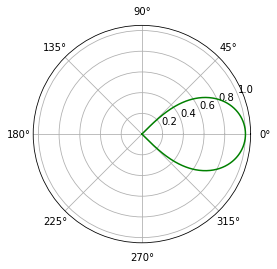

In [4]:
phi = Symbol('phi')
a = Symbol('a', positive=True)

Phi = np.linspace(-np.pi/4, np.pi/4, 256)
R = (np.cos(Phi*2))**0.5
plt.polar(Phi, R, color='green')

r = a*(Cos(2*phi))**S.Half
S_p = Integral((2*Pi*r*Sin(phi)*(r**2 + r.diff(phi)**2)**S.Half).simplify(), (phi, -Pi/4, Pi/4))
display(S_p)

S_p = Integral(2*Pi*a**2*Sin(phi), (phi, 0, Pi/4))

display(sympy.Eq(S_p,S_p.doit()))

### Индивидуальное задание 
Найти площадь поверхности, образованной вращением $y = f(x)$ около оси OX.

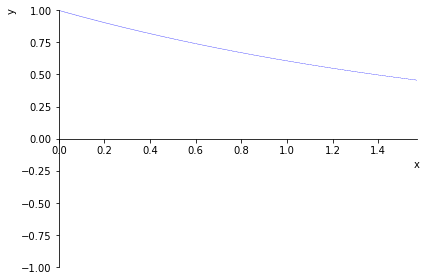

exp(-x/2)

Integral(sqrt(4*exp(x) + 1)*exp(-x)/2, (x, 0, pi))

2*pi*(-sqrt(5)/2 - 2*asinh(1/2) + 2*asinh(exp(-pi/2)/2) + sqrt(exp(-pi) + 4)*exp(-pi/2)/2 + (-sqrt(exp(-pi) + 4)*exp(-pi/2)/2 - 2*asinh(exp(-pi/2)/2) + 2*asinh(1/2) + sqrt(5)/2)*exp(-pi/4))

In [5]:
x = Symbol('x', positive=True)
y = Symbol('y')
t = Symbol('t')

Eq1 = sympy.Eq(y, sympy.E**(-x/2))
plot_implicit(Eq1, (x, 0, Pi/2), (y, -1, 1))

y1 = solve(Eq1, y)[0]
display(y1)
S_OX1 = Integral((y1*(1 + y1.diff(x)**2)**S.Half).simplify(), (x, 0, Pi))
res = S_OX1.transform(sympy.E**(-x), t)

display(S_OX1, 2*Pi*res.integrate((t, 1, sympy.E**(-Pi/4))))